In [7]:
from math import floor
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.nn.init import xavier_uniform_
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib
import matplotlib.pyplot as plt
import data
import model as md



In [2]:
vocab_size = 10000
train_ds = data.load_dataset("data/train.csv", vocab_size=vocab_size)
train_loader = DataLoader(train_ds, batch_size=10, collate_fn=data.collate, shuffle=True)
test_ds = data.load_dataset("data/test.csv", encoding=train_ds.encoding)
test_loader = DataLoader(test_ds, batch_size=10, collate_fn=data.collate, shuffle=False)

In [5]:
model = md.ConvAttModel(vocab_size=vocab_size, kernel_size=10, num_filter_maps=16, embed_size=100, dropout=0.5)

md.train(model, train_loader, test_loader, 2, weight_decay=0.00001)

Epoch 0	Training Loss: 0.222295	Train APS: 0.217962	Test APS: 0.152897	Time Taken: 593.18 seconds
Epoch 1	Training Loss: 0.210024	Train APS: 0.259529	Test APS: 0.170490	Time Taken: 618.64 seconds


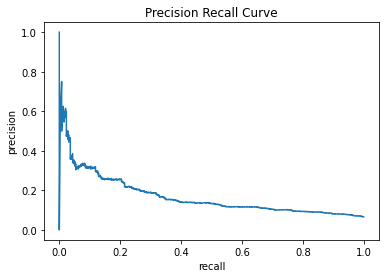

In [8]:
y_true, y_pred = md.predict(model, test_loader)

precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

fig, axis = plt.subplots()
axis.plot(recall, precision)
axis.set(xlabel="recall", ylabel="precision", title="Precision Recall Curve")
fig.show()

In [9]:
average_precision_score(y_true, y_pred)

0.17049022821615795